<h2 style="text-align: center">KNN algorithm <span style="font-size: 20px">(K-Nearest Neighbour)</span></h2>

KNN algorithm is <span style="color: tomato">instance based</span> or <span style="color: tomato">memory based</span> supervised learning.

> **What's <span style="color: red">"K"</span> in KNN?**

*Ans:* Number of nearest neighbour(s)

> How shall I choose the value ok "k"

- Euclidean distance
- Manhattan distance
![distance](distance.JPG)

KNN is considered as lazy learner. It's not advised to use this model for large datasets

In [40]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [41]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [42]:
#print(iris.DESCR)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
import pandas as pd
ir = pd.DataFrame(iris.data)
ir

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
ir.columns = iris.feature_names
ir

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
ir["class"] = iris.target
print(iris.target_names)
ir.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Split datasets into train and test

In [59]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

#### Create model

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)

#fitting the model
knn.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_test)
# We'll compare this value with y_test to find out the accuracy

#### Model Accuracy 

In [61]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

92.10526315789474

In [62]:
mean_accuracy = knn.score(X_test, y_test)
mean_accuracy

0.9210526315789473

> What's the difference between **knn.score** vs **accuracy_score**

***KNN score:*** It takes (X_test, y_test), then convert every X_test to y_pred, then find difference between y_pred and corresponding y_test and then show the mean value.

***accuracy_score:*** takes all X_test or other values as well to find the accuracy.

In [63]:
print("Accuracy of our model is: " + str(round(accuracy, 2)) + "%")

Accuracy of our model is: 92.11%


#### confusion matrix

![confusion-matrix](confusion_matrix.JPG)

In [18]:
cm = confusion_matrix(y_pred, y_test)
print(iris.target_names)
print(cm)

['setosa' 'versicolor' 'virginica']
[[11  0  0]
 [ 0  9  2]
 [ 0  1 15]]


> How to find the best k?

[Go to this website](https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification "Kaggle")

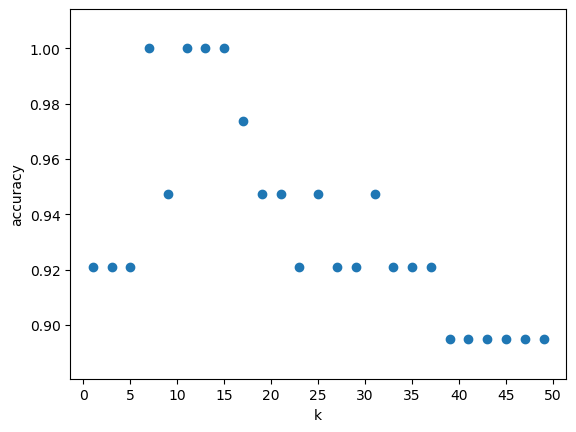

In [65]:
k_range = range(1,50, 2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);

In [66]:
MSE = [1 - x for x in scores]

# finding best k
best_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style, cm
style.use("default")
cmap = cm.get_cmap('gnuplot')

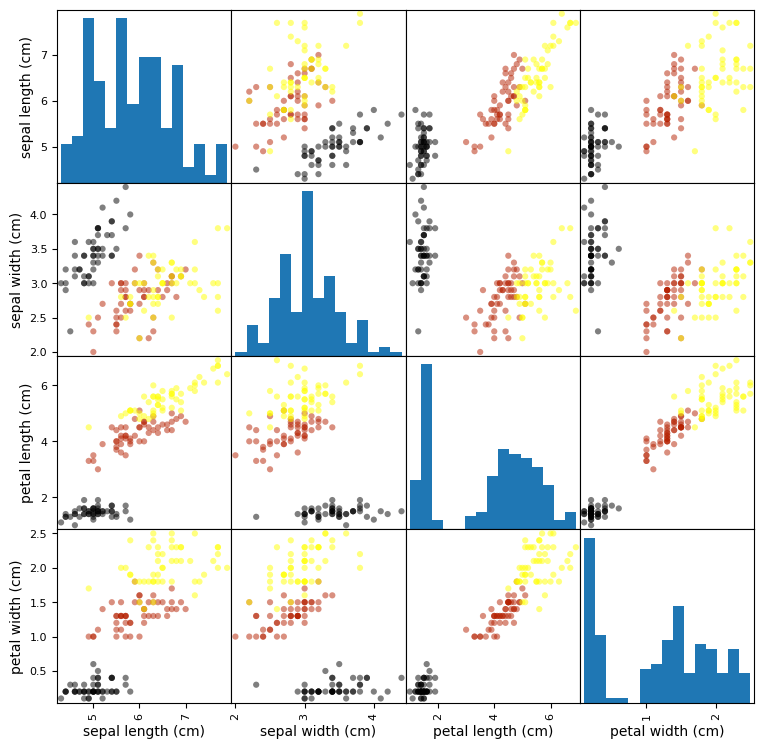

In [13]:
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#ploting scatter graph of species comparing all features to each other
scatter_matrix(dataframe, c=iris['target'],marker='o', s=20, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.show()

# A tutorial from coursera

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [39]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


##### Python unique,  zip and dict

In [23]:
vegetables = pd.Series(["broccoli", "cabbage", "broccoli", "nut", "lemon", "nut", "broccoli"])
print(vegetables.unique()) # ['broccoli' 'cabbage' 'nut' 'lemon']

companies = ["goole", "ibm", "microsoft"]
names = ["Tom", ["Chris", "Ross"], "Hanks"]
print(dict(zip(companies, names)))

#python dict == javascript object. key:value pair

['broccoli' 'cabbage' 'nut' 'lemon']
{'goole': 'Tom', 'ibm': ['Chris', 'Ross'], 'microsoft': 'Hanks'}


In [24]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

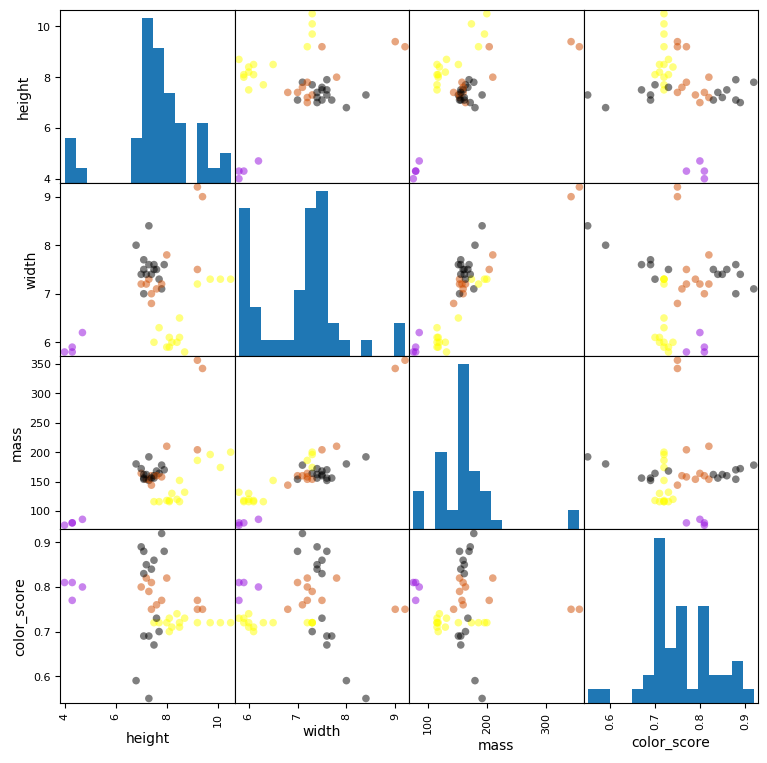

In [31]:
from matplotlib import style, cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

style.use("default")
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=30, 
                            hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

#### We'll use mass, width and height feature to find out the name of the fruit

In [69]:
X = fruits[["mass", "width", "height"]]
y = fruits["fruit_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
knn.score(X_test, y_test)

0.5333333333333333

In [73]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

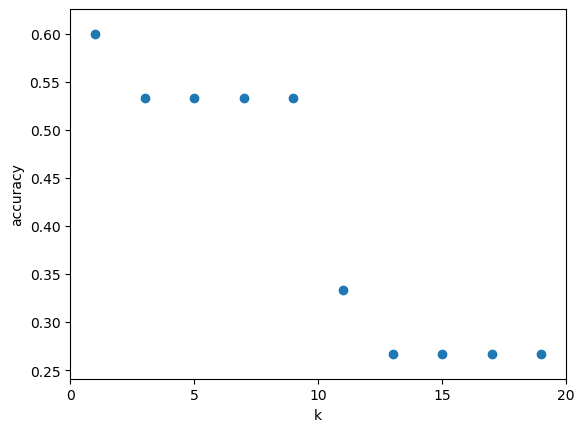

In [74]:
k_range = range(1, 20, 2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [75]:
MSE = [1 - x for x in scores]

# finding best k
best_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [86]:
print(MSE)
print(min(MSE)) #0.4
print(MSE.index(min(MSE)))
print(len(k_range))

[0.4, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.6666666666666667, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334]
0.4
0
10


In [87]:
array = [4, 9, 10, 6]
array.index(9)

1

# Asignment KNN
Breast cancer data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

##### The object returned by load_breast_cancer() is a scikit-learn Bunch object, which is similar to a dictionary.

In [11]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
def answer_one():
    
    # Your code here
    df = pd.DataFrame(cancer.data)
    df.columns = cancer.feature_names
    df["target"] = cancer.target.astype(float)
    
    return df


answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [3]:
def answer_two():
    cancerdf = answer_one()
    
#     df = cancerdf.target.value_counts().sort_index()
#     df.index = ['malignant', 'benign']
    malignant = len(cancerdf[cancerdf['target'] == 0])
    benign = len(cancerdf[cancerdf['target'] == 1])
    target = pd.Series(data = [malignant, benign], index = ['malignant', 'benign'])
    
    return df


answer_two()

<class 'pandas.core.series.Series'>


malignant    212
benign       357
Name: target, dtype: int64

In [20]:
def answer_three():
    cancerdf = answer_one()
    
    # Your code here
#     X = pd.DataFrame(cancer.data)
#     X.columns = cancerdf.feature_names
#     y = cancerdf["target"]
    X = cancerdf.iloc[:, :30]
    y = cancerdf.iloc[:, 30]
    
    return X, y

In [21]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    return X_train, X_test, y_train, y_test

In [22]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    # Your code here
    knn = KNeighborsClassifier(n_neighbors = 1)
    
    return knn.fit(X_train, y_train)

In [36]:
df = answer_one()
means = df.mean()[:-1].values
print(type(means))
X_train, X_test, y_train, y_test = answer_four()
print(X_test.shape, means.shape)
means
# df.iloc[:,-1]

<class 'numpy.ndarray'>
(143, 30) (30,)


array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [37]:
df = answer_one()
means = df.mean()[:-1].values.reshape(1, -1)
print(means.shape)
means

(1, 30)


array([[1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
        9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
        1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
        2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
        3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
        1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
        1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
        2.90075571e-01, 8.39458172e-02]])

In [25]:
means.shape

(1, 30)

<span style="color: tomato">values</span> will transform the data in numpy 1D array

**reshape(1, -1) vs reshape(-1, 1)**

<span style="color: tomato">reshape(1,-1):</span> we'll get following shape - (1,30)

<span style="color: tomato">reshape(-1, 1):</span> we'll get following shape - (30,1)

In [23]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    knn = answer_five()
    y_pred = knn.predict(means)
    
    return y_pred

answer_six()

array([1.])

In [28]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    y_pred = knn.predict(X_test)
    
    return y_pred

ans = answer_seven()
ans.shape

(143,)

In [29]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    score = knn.score(X_test, y_test)
    
    return score

answer_eight()

0.916083916083916

<span style="color: #FF0000">Reza</span>